In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = np.array([5,4,4,9,9,8,2,0,3,6])
dataMean = data.mean()
dataVar = np.var(data)


In [12]:
sampleData = np.array([5,4,9,8,2])
sampleDataMean = sampleData.mean()
sampleDataVar = np.var(sampleData, ddof=1)
dataMean, sampleDataMean, dataVar, sampleDataVar

(5.0, 5.6, 8.2, 8.3)

46.17477209021389 828.4269056120786


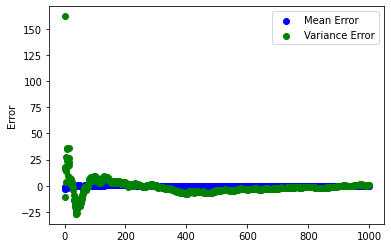

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import norm

Npoints = 200
diffMean = []
diffVariance = []
bestMean = []
bestVar = []
p=np.random.uniform(0,100,Npoints)
pmean = p.mean()
pvar = np.var(p)
N=1000

for i in range(N):
    sample = np.random.choice(p,50)
    smean = sample.mean()
    svar = np.var(sample,ddof=1)
    
    diffMean.append(pmean-smean)
    bestMean.append(np.sum(diffMean)/(len(diffMean)))
    diffVariance.append(pvar-svar)
    bestVar.append(np.sum(diffVariance)/len(diffVariance))

plt.scatter(range(N), bestMean, color='b', label = 'Mean Error')
plt.ylabel('Error')
plt.scatter(range(N), bestVar, color='g', label = 'Variance Error')
plt.legend(loc='upper right')
print(pmean, pvar)

33.2
24.2
17.2
12.2
9.2
8.2
9.2
12.2
17.2
24.2
39.25
27.0
17.25
10.0
5.25
3.0
3.25
6.0
11.25
19.0


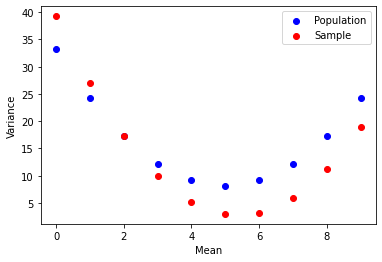

In [31]:
population = np.array([5,4,4,9,9,8,2,0,3,6])
sample = np.array([5,4,4,8,6])

def variance(sample, mean, bias):
    s2 = 0
    for i in range(0,len(sample)):
        x= sample[i]-mean
        s2=s2 + (x * x)
    var = s2/(len(sample)-bias)
    print(var)
    return var

N = 10
var_pop = []
var_sample = []

for mean in range(0,N):
    var_pop.append(variance(population, mean,0))

for mean in range(0,N):
    var_sample.append(variance(sample, mean,1))
    
plt.scatter(range(N), var_pop, color = 'b', label = 'Population')
plt.scatter(range(N), var_sample, color = 'r', label = 'Sample')
plt.ylabel('Variance')
plt.xlabel('Mean')


plt.legend(loc='upper right')

In [54]:
blood_pressure = np.array([76,64,62,81,70,72,81,63,67,77])
m = blood_pressure.mean()
deviation = blood_pressure-m
dev2 = sum(deviation*deviation)
var=dev2/(len(deviation)-1)
standard_deviation = np.sqrt(var)


'''
sample, sample_DeviationMean, sample_SquateDeviation
sampleDf = pd.DataFrame(data = [sample,sample_DeviationMean,sample_SquateDeviation]).transpose()
sampleDf
columnNames = ['Blood Pressure','Deviation from Mean','Square Deviation']

sampleDf.columns= columnNames
sampleDf
            

'''
standard_deviation

data = {'Blood Pressure':blood_pressure}
df = pd.DataFrame(data)
df['Deviation from Mean'] = deviation
df['Square Deviation'] = deviation*deviation
##df
standard_deviation

7.242620765686655

In [21]:
s = np.random.randint(1,7,100000)
Va = s.var()
Sv = s.var(ddof=1)
print(f'Population Mean: {s.mean()}')
print(f'Population Variance S2: {Va}')
print(f'Sample unbiased Variance S2: {Sv}')

Population Mean: 3.49964
Population Variance S2: 2.9182998704
Sample unbiased Variance S2: 2.918329053690537


Population Variance S2: 2.9121778391
var Sample: 0.5851639999999999
var Sample: 0.14856874999999997
var Sample: 0.029241439999999994
Best Estimate N*S2_sample: [2.9258199999999994, 2.971374999999999, 2.924143999999999]
Unbiased Estimate : 2.8342424242424245
Biased Estimate : 2.8059000000000003


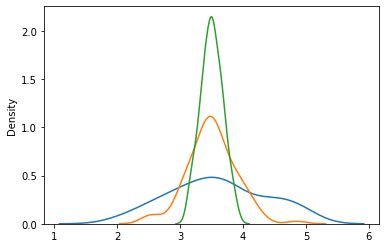

In [11]:
s = np.random.randint(1,7,100000)
print(f'Population Variance S2: {s.var()}')

x = 500
V = []

def getDistribution(s,M,N):
    samples = []
    np.random.seed(seed=3)
    for i in np.arange(N):
        sample = np.random.choice(s,M).sum()/M
        samples.append(sample)
    return samples

N = 100
for M in [5,20,100]:
    S = getDistribution(s,M,N)
    s2 = np.array(S).var(ddof = 0)
    V.append({M:s2})
    sns.kdeplot(data = S)
    print(f'var Sample: {s2}')
        
print(f'Best Estimate N*S2_sample: {[list(var.keys())[0] * list(var.values())[0] for index, var in enumerate(V)]}')

testSample = np.array(np.random.choice(s,100))
print(f'Unbiased Estimate : {testSample.var(ddof = 1)}')
print(f'Biased Estimate : {testSample.var(ddof = 0)}')

In [49]:
drinks = pd.read_csv('https://bit.ly/drinksbycountry')

In [48]:
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,country_Numeric,continent_Numeric,country_Numeric_Numeric,continent_Numeric_Numeric,country_Numeric_Numeric_Numeric,continent_Numeric_Numeric_Numeric
0,Afghanistan,0,0,0,0.0,Asia,Afghanistan,Asia,Afghanistan,Asia,Afghanistan,Asia
1,Albania,89,132,54,4.9,Europe,Albania,Europe,Albania,Europe,Albania,Europe
2,Algeria,25,0,14,0.7,Africa,Algeria,Africa,Algeria,Africa,Algeria,Africa
3,Andorra,245,138,312,12.4,Europe,Andorra,Europe,Andorra,Europe,Andorra,Europe
4,Angola,217,57,45,5.9,Africa,Angola,Africa,Angola,Africa,Angola,Africa


In [23]:
drinks.head()

asia = drinks.loc[drinks['continent'] == 'Asia']
asia.head()
asia.corr()

NA = drinks.loc[drinks['continent'] == 'North America']
import reNA.head()
NA.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,-0.073411,0.409038,0.612514
spirit_servings,-0.073411,1.000000,0.219815,0.720400
wine_servings,0.409038,0.219815,1.000000,0.608532
total_litres_of_pure_alcohol,0.612514,0.720400,0.608532,1.000000


In [51]:
import re
drinks.info()

stringCols = drinks.select_dtypes(exclude=[np.number])
print(stringCols.shape)
print(stringCols.columns)
numberDict = {}
stringCols = list(stringCols)
print(stringCols)
stringCols = list(set([re.sub('_Numeric', '', fname) for fname in stringCols]))
print(stringCols)
for col in stringCols:
    print(col)
    temp = list(drinks[col])
    temp = set(temp)
    numberDict[col] = {}
    for id, val in enumerate(temp):
        numberDict[col][val]=id
    drinks[col+'_Numeric'] = drinks[col]
    #drinks[col+'_Numeric'].replace(to_replace=numberDict[col], inplace = True)
    
print(numberDict)
drinks.info
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   continent_Numeric             193 non-null    object 
 7   country_Numeric               193 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.2+ KB
(193, 4)
Index(['country', 'continent', 'continent_Numeric', 'country_Numeric'], dtype='object')
['country', 'continent', 'continent_Numeric', 'country_Numeric']
['continent', 'country']
continent
country
{'continent': {'North America': 0, 'Af

<bound method DataFrame.info of          country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol      continent continent_Numeric  \
0                             0.0           Asia              Asia   
1                      